<a href="https://colab.research.google.com/github/Janeiii/COGS109_Project/blob/main/Watermelon_Quality_Prediction_Code_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Watermelon Quality Prediction

Goal: Predict the watermelon quality using logistic regression and K-nearest neighbors classification.

In [27]:
# Import the libraries
import pandas as pd # data processing, input CSV dile
import matplotlib.pyplot as plt # plotting data
import statsmodels.api as sm # linear & logistic regression
import numpy as np # linear algebra
import seaborn as sns # confusion matrix heatmap
import statsmodels.formula.api as smf # log-odds ratio

In [28]:
# Read in the data
data = pd.read_csv('/content/watermelon_data.csv')
data

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,Green,rolled up,turbid,clear,sunken,slippery,0.697,0.460,Yes
1,2,Dark,rolled up,low,clear,sunken,slippery,0.774,0.386,Yes
2,3,Dark,rolled up,turbid,clear,sunken,slippery,0.634,0.264,No
3,4,Green,rolled up,low,clear,sunken,slippery,0.608,0.318,Yes
4,5,light,rolled up,turbid,clear,sunken,slippery,0.556,0.215,Yes
...,...,...,...,...,...,...,...,...,...,...
204,214,Dark,rolled up,turbid,clear,sunken,slippery,0.635,0.271,Yes
205,215,Dark,curly,low,blurry,a little sunken,slippery,0.666,0.089,No
206,216,Green,straight,clear,clear,flat,sticky,0.244,0.268,No
207,217,light,straight,clear,very blurry,flat,slippery,0.245,0.058,No


In [29]:
# Understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Num           209 non-null    int64  
 1   Color         209 non-null    object 
 2   Root          209 non-null    object 
 3   Sound         209 non-null    object 
 4   Texture       209 non-null    object 
 5   Belly_button  209 non-null    object 
 6   Touch         209 non-null    object 
 7   Density       209 non-null    float64
 8   sugar_rate    209 non-null    float64
 9   GB            209 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 16.5+ KB


In [30]:
print("Column items in the dataset:")
print(data.columns.values)

print("Categorical columns:")
cat_cols = data.select_dtypes(include = 'object').columns.values
print(cat_cols)

print("Numerical columns:")
numeric_cols = data.select_dtypes(include = np.number).columns.values
print(numeric_cols)

Column items in the dataset:
['Num' 'Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'Density'
 'sugar_rate' 'GB']
Categorical columns:
['Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'GB']
Numerical columns:
['Num' 'Density' 'sugar_rate']


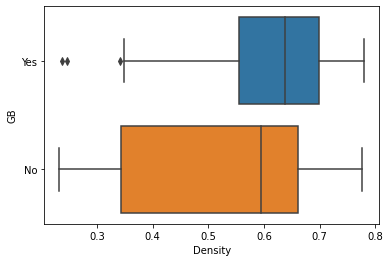

In [31]:
sns.boxplot(x = data['Density'], y = data['GB'])

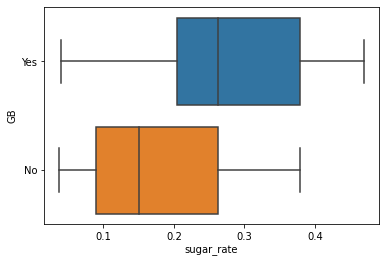

In [32]:
sns.boxplot(x = data['sugar_rate'], y = data['GB'])


In [33]:
# Encode labels for the categorical variables
from sklearn import preprocessing  

label_encoder = preprocessing.LabelEncoder()
  
data['Color']= label_encoder.fit_transform(data['Color'])
data['Root']=label_encoder.fit_transform(data['Root'])
data['Sound']=label_encoder.fit_transform(data['Sound'])
data['Texture']=label_encoder.fit_transform(data['Texture'])
data['Touch']=label_encoder.fit_transform(data['Touch'])
data['Belly_button']=label_encoder.fit_transform(data['Belly_button'])
data['GB'] = label_encoder.fit_transform(data['GB'])

In [34]:
# Exclude Num from columns because it is not a relevant predictor
feature_cols = ['Color', 'Root', 'Sound', 'Texture','Belly_button','Touch','Density', 'sugar_rate']
X = data[feature_cols] # Features
y = data.GB # Target variable

In [35]:
# Split the data into 80% training and 20% testing with a randomstate to balance out the dataset
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
# Check for the amount of good/bad watermelons in the test set
good_list=[]
bad_list =[]

for i in y_test:
    if i == 0:
        bad_list.append(i)
    else:
        good_list.append(i)

print("Test set has: ", len(bad_list), "bad watermelons")
print("Test set has: ", len(good_list), "good watermelons")

Test set has:  27 bad watermelons
Test set has:  15 good watermelons


### Log odds ratio

In [37]:
logistic1 = smf.logit(formula= 'GB ~ Color + Root + Sound + Texture + Belly_button + Touch + Density + sugar_rate', data= data)
fitted = logistic1.fit()
fitted.summary()
np.exp(fitted.params)

Optimization terminated successfully.
         Current function value: 0.474812
         Iterations 7


Intercept         0.004558
Color             0.758312
Root              1.643137
Sound             3.021667
Texture           1.292895
Belly_button      1.488933
Touch             0.611481
Density           8.755790
sugar_rate      638.171086
dtype: float64

### Logistic Regression

In [38]:
# instantiate the model (using the default parameters)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [39]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22,  5],
       [ 9,  6]])

Text(0.5, 257.44, 'Predicted label')

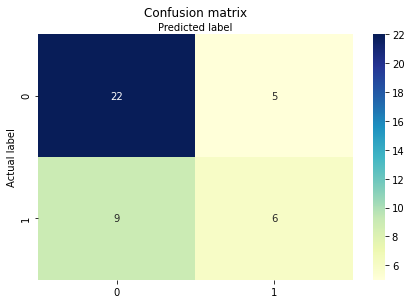

In [40]:
# Convert the confusion matrix array into a heatmap
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
from sklearn.metrics import recall_score, precision_score,accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6666666666666666
Precision: 0.5454545454545454
Recall: 0.4


### K-Nearest Neighbors (KNN)

In [42]:
# KNN - select optimal K on the training set using the elbow method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

#elbow curve for the error rate; train with differnet k values
rmse_list = [] #to store rmse values for different k
for K in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,y_train) #train model
    pred_k = model.predict(X_test) # predict output
    
    error = sqrt(mean_squared_error(y_test,pred_k)) #calculate rmse
    rmse_list.append(error) #store rmse values
    print('RMSE value for K= ' , K , 'is:', error)

RMSE value for K=  1 is: 0.4629100498862757
RMSE value for K=  2 is: 0.4629100498862757
RMSE value for K=  3 is: 0.3450327796711771
RMSE value for K=  4 is: 0.408248290463863
RMSE value for K=  5 is: 0.3779644730092272
RMSE value for K=  6 is: 0.4879500364742666
RMSE value for K=  7 is: 0.4879500364742666
RMSE value for K=  8 is: 0.4879500364742666
RMSE value for K=  9 is: 0.4879500364742666
RMSE value for K=  10 is: 0.4879500364742666
RMSE value for K=  11 is: 0.4879500364742666
RMSE value for K=  12 is: 0.4879500364742666
RMSE value for K=  13 is: 0.4879500364742666
RMSE value for K=  14 is: 0.4879500364742666
RMSE value for K=  15 is: 0.4879500364742666
RMSE value for K=  16 is: 0.4879500364742666
RMSE value for K=  17 is: 0.4879500364742666
RMSE value for K=  18 is: 0.4879500364742666
RMSE value for K=  19 is: 0.4879500364742666
RMSE value for K=  20 is: 0.4879500364742666
RMSE value for K=  21 is: 0.4879500364742666
RMSE value for K=  22 is: 0.4879500364742666
RMSE value for K=  2

Text(0, 0.5, 'Error Rate')

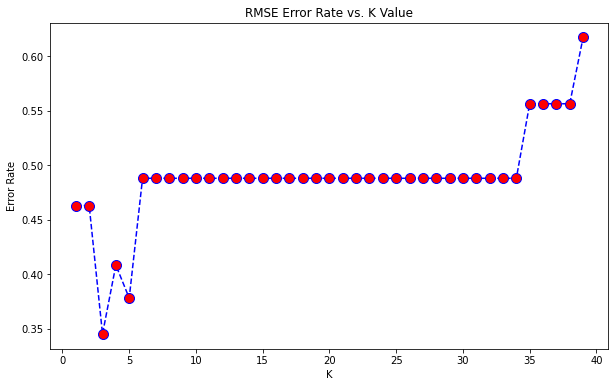

In [43]:
# Visualize the elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40), rmse_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
# Select the K value with the lowest RMSE 
# we find that the earliest occurence of the lowest K is is K = 3 with RMSE = 0.3450327796711771

In [45]:
# Use best K KNN to train on all the training data (K = 3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train) #train model
y_pred = model.predict(X_test) # predict output

In [46]:
# Test on the 20% to get accuracy measure
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[26,  1],
       [ 4, 11]])

Text(0.5, 257.44, 'Predicted label')

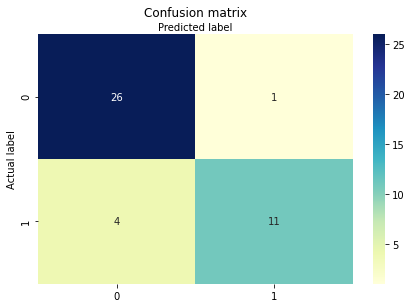

In [47]:
# Convert the confusion matrix array into a heatmap
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8809523809523809
Precision: 0.9166666666666666
Recall: 0.7333333333333333


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

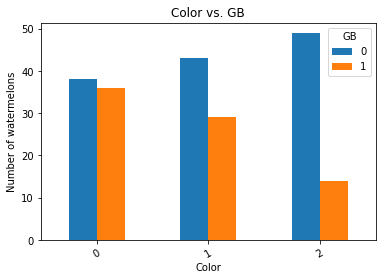

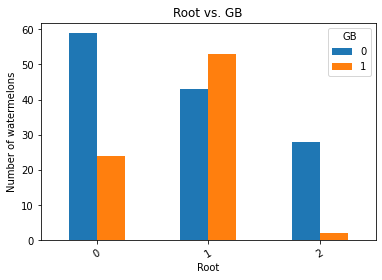

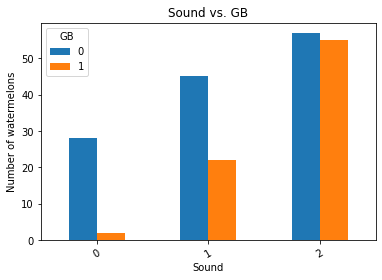

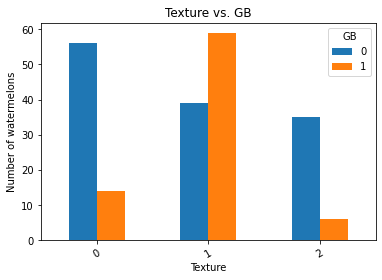

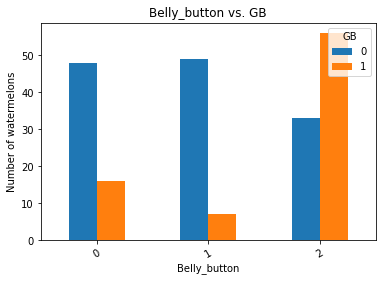

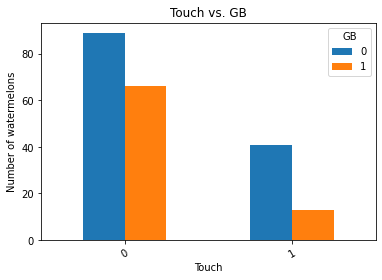

In [49]:
%matplotlib inline
pd.crosstab(data.Color,data.GB).plot(kind='bar')
plt.title('Color vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Root,data.GB).plot(kind='bar')
plt.title('Root vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Sound,data.GB).plot(kind='bar')
plt.title('Sound vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Texture,data.GB).plot(kind='bar')
plt.title('Texture vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Belly_button,data.GB).plot(kind='bar')
plt.title('Belly_button vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")
pd.crosstab(data.Touch,data.GB).plot(kind='bar')
plt.title('Touch vs. GB')
plt.ylabel('Number of watermelons')
plt.xticks(rotation=30, horizontalalignment="center")

In [50]:
data

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,1,1,2,1,2,0,0.697,0.460,1
1,2,0,1,1,1,2,0,0.774,0.386,1
2,3,0,1,2,1,2,0,0.634,0.264,0
3,4,1,1,1,1,2,0,0.608,0.318,1
4,5,2,1,2,1,2,0,0.556,0.215,1
...,...,...,...,...,...,...,...,...,...,...
204,214,0,1,2,1,2,0,0.635,0.271,1
205,215,0,0,1,0,0,0,0.666,0.089,0
206,216,1,2,0,1,1,1,0.244,0.268,0
207,217,2,2,0,2,1,0,0.245,0.058,0
